In [2]:
import pandas as pd 
import numpy as np 
from pandas_datareader import data 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import yfinance as yf

In [14]:
#importação dos ativos que farão parte da carteira
weg_df = yf.download('WEGE3.SA',start='2023-01-01')
#criação de dataframes para cada coluna do referencial/referenciais para analise mais granular
abertura_ibov= pd.DataFrame({'Date':ibov_df.index, 'Open':ibov_df['Open']})
alta_ibov=pd.DataFrame({'Date':ibov_df.index, 'High':ibov_df['High']})
baixa_ibov=pd.DataFrame({'Date':ibov_df.index, 'Low':ibov_df['Low']})
fechamento_ibov=pd.DataFrame({'Date':ibov_df.index, 'Close':ibov_df['Close']})
fechamento_ajustado_ibov=pd.DataFrame({'Date':ibov_df.index, 'Adj Close':ibov_df['Adj Close']})
volume_ibov=pd.DataFrame({'Date':ibov_df.index, 'Volume':ibov_df['Volume']})
retorno_ibov_fechamento=fechamento_ibov['Close'].pct_change()
retorno_fechamento_ajustado=fechamento_ajustado_ibov['Adj Close'].pct_change()
retorno_volume=volume_ibov['Volume'].pct_change()
dataframe_retornos_ibov= pd.DataFrame({
    'Retorno_ibov_fechamento':retorno_ibov_fechamento,
    'retorno_ibov_fechamento_ajustado':retorno_fechamento_ajustado,
    'retorno_volume_ibov':retorno_volume
})
print(dataframe_retornos_ibov.head())

[*********************100%%**********************]  1 of 1 completed
            Retorno_ibov_fechamento  retorno_ibov_fechamento_ajustado  \
Date                                                                    
2023-01-02                      NaN                               NaN   
2023-01-03                -0.020775                         -0.020775   
2023-01-04                 0.011213                          0.011213   
2023-01-05                 0.020734                          0.020734   
2023-01-06                 0.012258                          0.012258   

            retorno_volume_ibov  
Date                             
2023-01-02                  NaN  
2023-01-03             0.779312  
2023-01-04            -0.001071  
2023-01-05             0.073406  
2023-01-06            -0.186011  


Volatilidade do ativo WEGE3 é de: 36.821665431607386
A Variação percentual do ativo é de 9.06% de Desvalorização
O Desvio padrão do ativo é de: 75.83


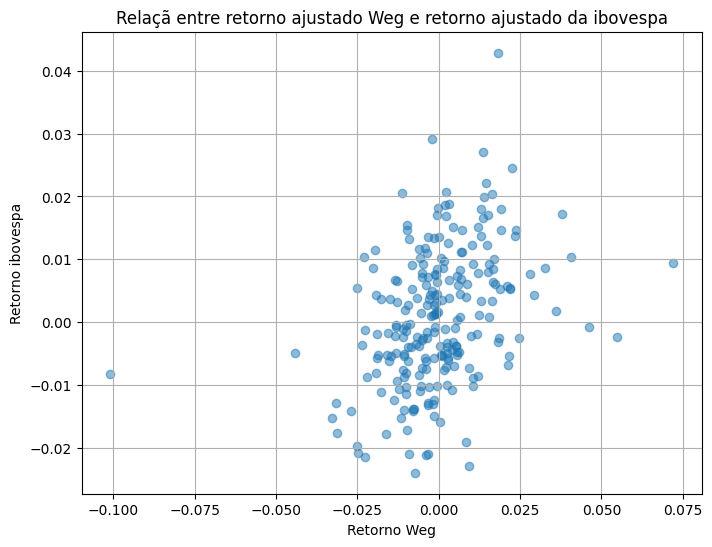

In [15]:
# Criação dos DataFrames para cada coluna do ativo WEGE3
abertura_weg= pd.DataFrame({'Date':weg_df.index, 'Open':weg_df['Open']})
alta_weg=pd.DataFrame({'Date':weg_df.index, 'High':weg_df['High']})
baixa_weg=pd.DataFrame({'Date':weg_df.index, 'Low':weg_df['Low']})
fechamento_weg=pd.DataFrame({'Date':weg_df.index, 'Close':weg_df['Close']})
fechamento_ajustado_weg=pd.DataFrame({'Date':weg_df.index, 'Adj Close':weg_df['Adj Close']})
volume_weg=pd.DataFrame({'Date':weg_df.index, 'Volume':weg_df['Volume']})
abertura_consolidada_weg=abertura_weg['Open'].pct_change()
alta_consolidada_weg=alta_weg['High'].pct_change()
baixa_consolidada_weg=baixa_weg['Low'].pct_change()
fechamento_consolidado_weg=fechamento_weg['Close'].pct_change()
fechamento_ajustado_consolidado_weg=fechamento_ajustado_weg['Adj Close'].pct_change()
volume_consolidado_weg=volume_weg['Volume'].pct_change()
# Cálculo da volatilidade do ativo
volatilidade = np.std(weg_df['Close']) * np.sqrt(252)
print(f'Volatilidade do ativo WEGE3 é de: {volatilidade}')
# Cálculo da variação percentual do preço de fechamento
preco_fechamento_incial = weg_df['Close'].iloc[0]
preco_fechamento_final = weg_df['Close'].iloc[-1]
variacao_percentual = ((preco_fechamento_incial- preco_fechamento_final)/ abs(preco_fechamento_incial)) * 100
# Verificação do indicador de variação (desvalorização, valorização ou nenhuma variação)
if preco_fechamento_final < preco_fechamento_incial:
    indicador = "Desvalorização"
elif preco_fechamento_inicial < preco_fechamento_final < 0:
    indicador = "Valorização"
else: 
    indicador = "*Não obteve variação no periodo"
    
print (f'A Variação percentual do ativo é de {abs(variacao_percentual):.2f}% de {indicador}')
# Cálculo do desvio padrão do ativo
desvio_padrao=np.std(valores)
print(f"O Desvio padrão do ativo é de: {desvio_padrao:.2f}")

# Cálculo dos retornos e criação do DataFrame com os retornos do ativo WEGE3
retorno_weg=fechamento_weg['Close'].pct_change()
retorno_ajustado_weg=fechamento_ajustado_weg['Adj Close'].pct_change()
retorno_volume_weg=volume_weg['Volume'].pct_change()
dataframe_retornos_weg=pd.DataFrame({
    'Retorno_Weg':fechamento_consolidado_weg,
    'Retorno_ajustado_Weg':fechamento_ajustado_consolidado_weg,
    'Retorno_Volume_Weg':volume_consolidado_weg
})
# Concatenação dos DataFrames de retornos do ativo WEGE3 e da Ibovespa para análise
dataframe_analise_weg=pd.concat([dataframe_retornos_weg, dataframe_retornos_ibov], axis=1)
# Cálculo da correlação entre os retornos do ativo WEGE3 e da Ibovespa
correlacao_weg=dataframe_analise_weg.corr()
# Visualização da relação entre os retornos ajustados do ativo WEGE3 e da Ibovespa
plt.figure(figsize=(8, 6))
plt.scatter(dataframe_analise_weg['Retorno_ajustado_Weg'], dataframe_analise_weg['retorno_ibov_fechamento_ajustado'], alpha = 0.5)
plt.title('Relaçã entre retorno ajustado Weg e retorno ajustado da ibovespa')
plt.xlabel('Retorno Weg')
plt.ylabel('Retorno ibovespa')
plt.grid(True)
plt.show()

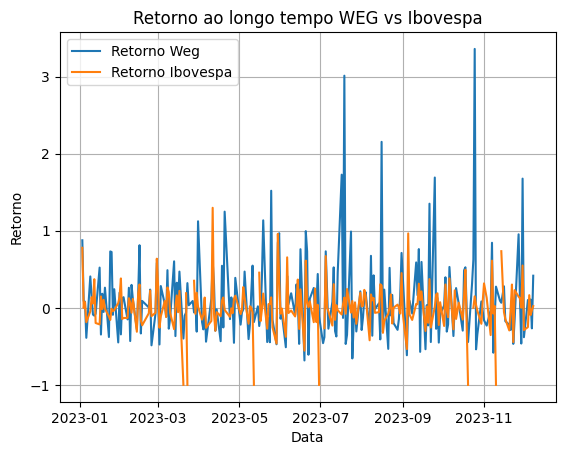

In [16]:
plt.plot(dataframe_analise_weg['Retorno_Volume_Weg'], label='Retorno Weg')
plt.plot(dataframe_analise_weg['retorno_volume_ibov'], label='Retorno Ibovespa')
plt.title('Retorno ao longo tempo WEG vs Ibovespa')
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True)
plt.show()

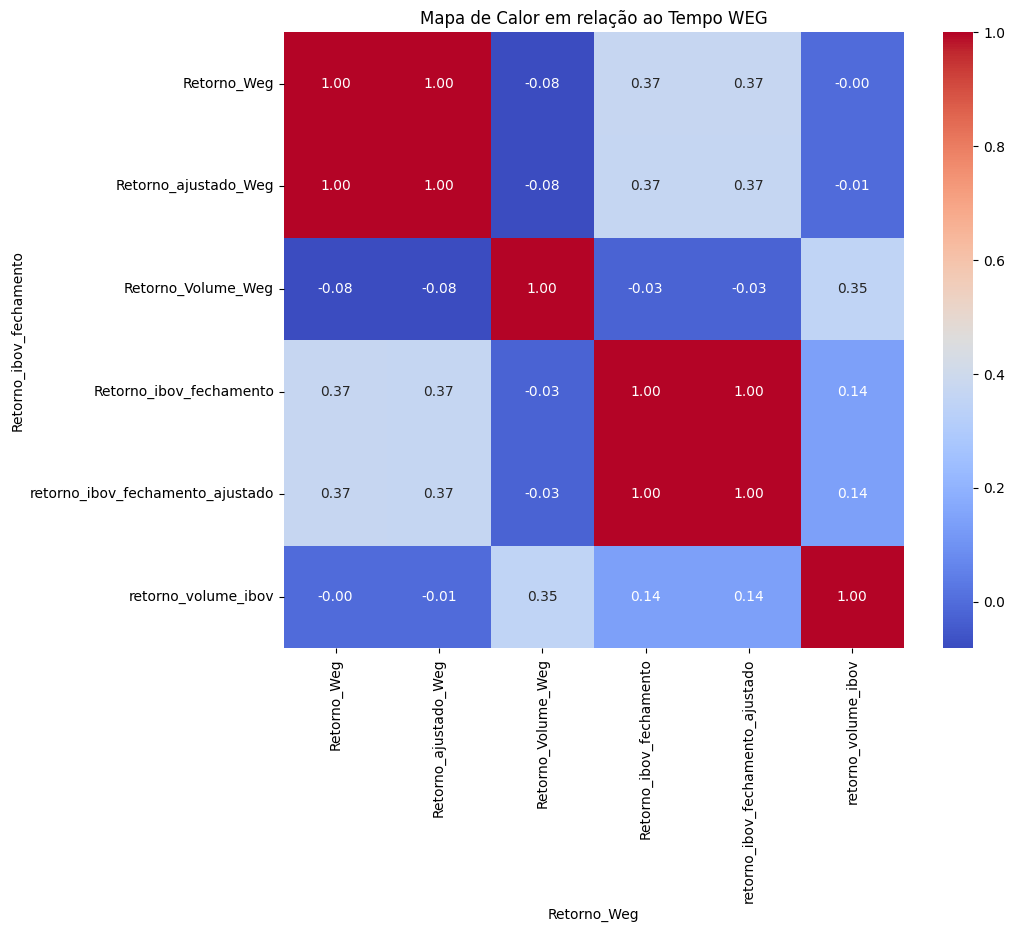

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(correlacao_weg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor em relação ao Tempo WEG')
plt.xlabel('Retorno_Weg')
plt.ylabel('Retorno_ibov_fechamento')
plt.show()

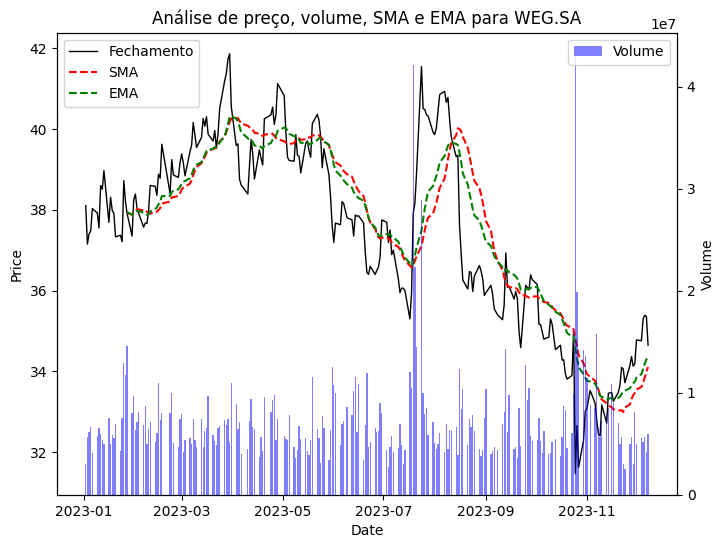

In [18]:
#calculo de médias 
#média movel simples(SMA)
window=50
weg_df['SMA']=weg_df['Close'].rolling(window=window).mean()
weg_df['SMA_abertura']=weg_df['Open'].rolling(window=window).mean()
weg_df['SMA_alta']=weg_df['High'].rolling(window=window).mean()
weg_df['SMA_baixa']=weg_df['Low'].rolling(window=window).mean()
#média movel exponencial(EMA)
weg_df['EMA'] = weg_df['Close'].ewm(span=window, min_periods=window).mean()
weg_df['EMA_abertura']=weg_df['Open'].ewm(span=window, min_periods=window).mean()
weg_df['EMA_alta']=weg_df['High'].ewm(span=window, min_periods=window).mean()
weg_df['EMA_baixa']=weg_df['Low'].ewm(span=window, min_periods=window).mean()
#gráfico em candlestick para analise das médias
fig, ax1=plt.subplots(figsize=(8,6))
ax2=ax1.twinx()
ax1.plot(weg_df.index, weg_df['Close'], label='Fechamento', color='black', linewidth=1)
ax2.bar(weg_df.index, weg_df['Volume'], label='Volume', color='blue', alpha=0.5)
ax1.plot(weg_df.index, weg_df['Close'].rolling(window=20).mean(), label='SMA', color='red', linestyle='--')
ax1.plot(weg_df.index, weg_df['Close'].ewm(span=20, min_periods=20).mean(), label='EMA', color='green', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2.set_ylabel('Volume')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Análise de preço, volume, SMA e EMA para WEG.SA')
plt.show()

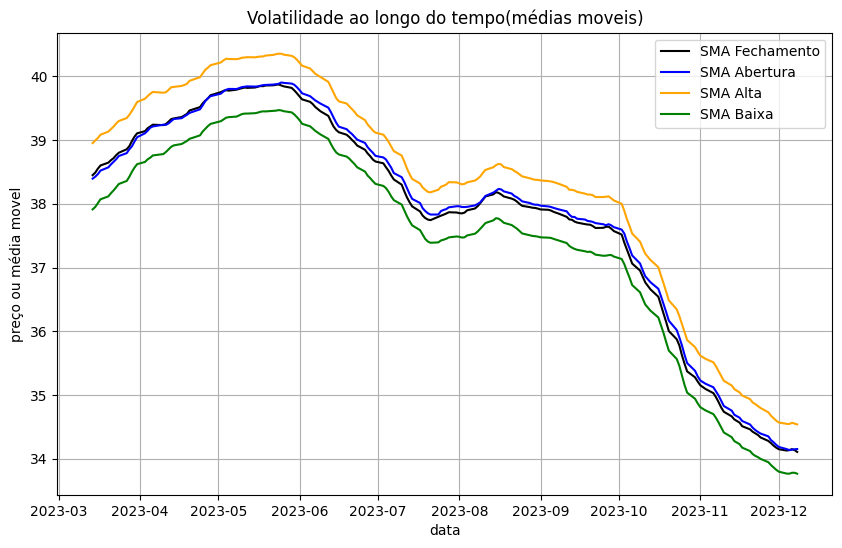

In [19]:
plt.figure(figsize=(10,6))
plt.plot(weg_df['SMA'], label='SMA Fechamento',color='black')
plt.plot(weg_df['SMA_abertura'], label='SMA Abertura', color='blue')
plt.plot(weg_df['SMA_alta'], label='SMA Alta', color='orange')
plt.plot(weg_df['SMA_baixa'], label='SMA Baixa', color='green')
plt.title('Volatilidade ao longo do tempo(médias moveis)')
plt.xlabel('data')
plt.ylabel('preço ou média movel')
plt.legend()
plt.grid(True)
plt.show()

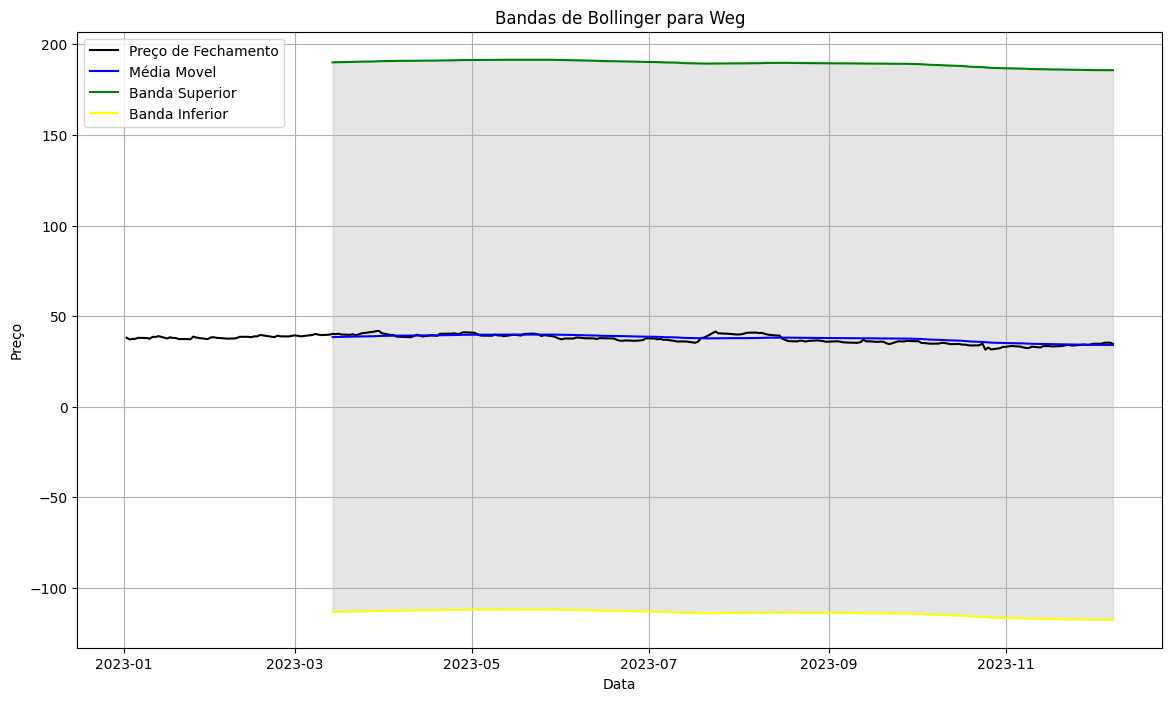

In [20]:
#calculo de bandas de bollinger
period=20
std_multiplier=2
weg_df['Upper']=weg_df['SMA']+(desvio_padrao* std_multiplier)
weg_df['Lower']=weg_df['SMA'] - (desvio_padrao* std_multiplier)
plt.figure(figsize=(14,8))
plt.plot(weg_df['Close'], label='Preço de Fechamento', color='black')
plt.plot(weg_df['SMA'], label='Média Movel', color='Blue')
plt.plot(weg_df['Upper'], label='Banda Superior', color='Green')
plt.plot(weg_df['Lower'], label='Banda Inferior', color='Yellow')
plt.fill_between(weg_df.index, weg_df['Upper'], weg_df['Lower'], color='Gray', alpha=0.2)#preencher entre as bordas
plt.title('Bandas de Bollinger para Weg')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

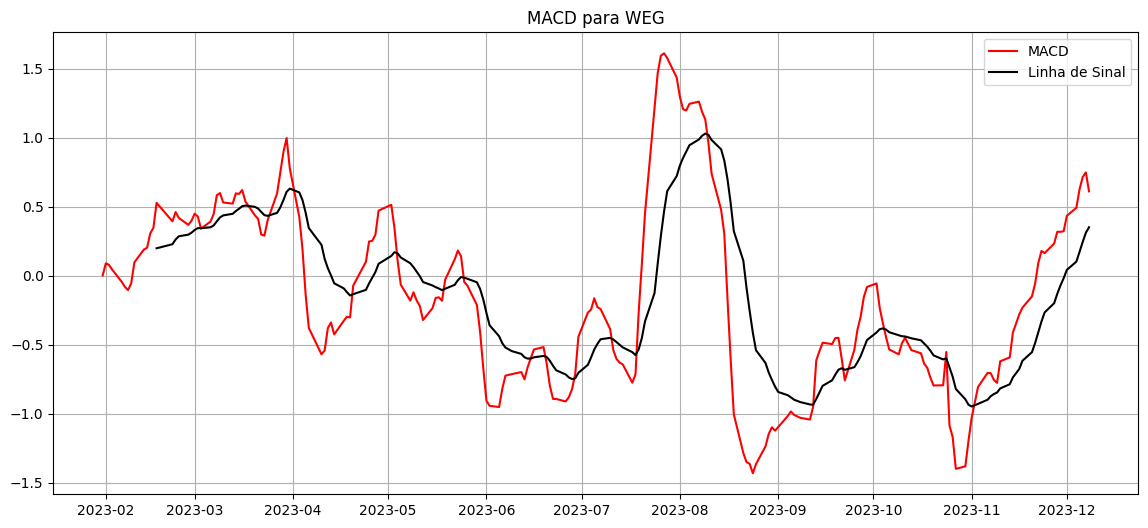

In [21]:
#analise de MACD
periodo_curto=6
periodo_longo=22
periodo_sinal=14
ema_curto=weg_df['Close'].ewm(span=periodo_curto,min_periods=periodo_curto).mean()
ema_longo=weg_df['Close'].ewm(span=periodo_longo, min_periods=periodo_longo).mean()
macd=ema_curto-ema_longo
sinal=macd.ewm(span=periodo_sinal, min_periods=periodo_sinal).mean()
plt.figure(figsize=(14,6))
plt.plot(macd, label='MACD', color='red')
plt.plot(sinal, label='Linha de Sinal', color='black')
plt.title('MACD para WEG')
plt.grid(True)
plt.legend()
plt.show()